In [326]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, \
                            accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score

In [327]:
data = pd.read_excel("AirQualityUCI.xlsx")
df = pd.DataFrame(data)

In [328]:
# statistics of the data
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [329]:
df['NMHC(GT)'].value_counts()

-200    8443
 66       14
 40        9
 29        9
 88        8
        ... 
 422       1
 424       1
 339       1
 445       1
 307       1
Name: NMHC(GT), Length: 430, dtype: int64

In [330]:
df.replace(to_replace= -200, value= np.NaN, inplace= True)
df = df.dropna()

In [331]:
# df = df.drop(columns=['Date', 'Time'], axis= 1)
used_df = df[['NMHC(GT)', 'RH']]
used_df = used_df.to_numpy()
used_df.astype(float)

array([[150.        ,  48.87500095],
       [112.        ,  47.69999981],
       [ 88.        ,  53.97500038],
       ...,
       [212.        ,  66.10000038],
       [275.        ,  66.875     ],
       [275.        ,  66.75000191]])

In [332]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(used_df)

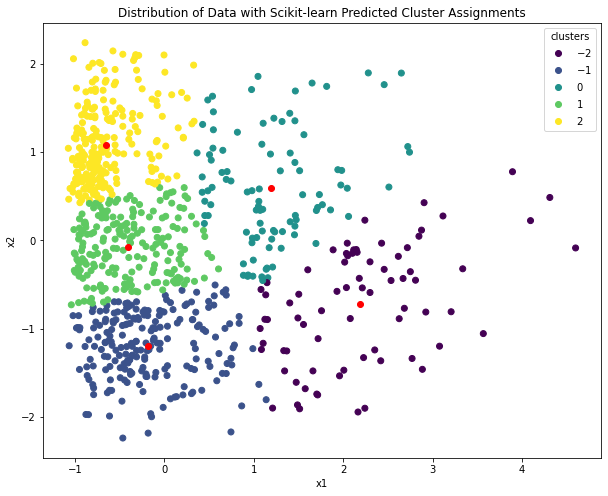

In [333]:
# Buat model KMeans
clt = KMeans(n_clusters=5, max_iter=300, random_state=0, algorithm='full')

# Cocokkan model dengan data
clt.fit(data_scaled)

# Cluster centers
centers = clt.cluster_centers_
y = data_scaled[:,1].astype(int)

# Dapatkan prediksi
y_pred = clt.predict(data_scaled)

# Make labels discrete 
y_pred = (y_pred.astype(int) - 2)*(-1)

# Dapatkan prediksi sentroid
centers_pred = clt.cluster_centers_

# Visualisasikan prediksi
fig, ax    = plt.subplots(figsize=(10,8))
sc         = ax.scatter(data_scaled[:,0],data_scaled[:,1],c=y_pred)
sc_centers = ax.scatter(centers_pred[:,0],centers_pred[:,1],c='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distribution of Data with Scikit-learn Predicted Cluster Assignments')
ax.legend(*sc.legend_elements(), title='clusters')
plt.show()

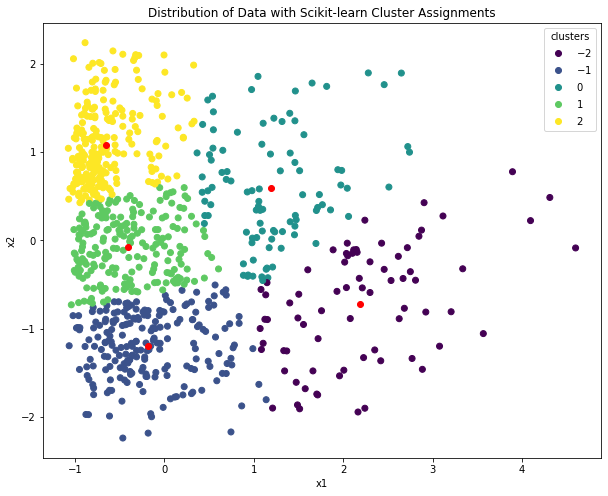

In [334]:
# Visualisasikan prediksi
fig, ax    = plt.subplots(figsize=(10,8))
sc         = ax.scatter(data_scaled[:,0],data_scaled[:,1],c=y_pred)
sc_centers = ax.scatter(centers[:,0],centers[:,1],c='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distribution of Data with Scikit-learn Cluster Assignments')
ax.legend(*sc.legend_elements(), title='clusters')
plt.show()

In [335]:
# Seberapa akurat estimasi sentroid yang dihasilkan?
print(f'The mean absolute error between the predicted and true centroids is: {mean_absolute_error(centers,centers_pred[[-2,-1,0,1,2]])}')

acc = accuracy_score(y, y_pred)
pre = precision_score(y, y_pred, average='weighted') 
rec = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
print(f'Accuracy score: {acc:.4f}')
print(f'Precision score: {pre:.4f}')
print(f'Recall score: {rec:.4f}')
print(f'F1 score: {f1:.4f}')

The mean absolute error between the predicted and true centroids is: 1.1981941780598633
Accuracy score: 0.2527
Precision score: 0.5939
Recall score: 0.2527
F1 score: 0.2750


In [336]:
y.round()

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  2,  2,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  1,  1,  1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1, -1, -1,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,
        0,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1, -1, -1, -1, -1, -2, -2,
       -2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  1,  1,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  2,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,
        1,  1,  2,  1,  1

In [337]:
y_pred

array([ 1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0,  0,  2,  0,  2,  2,
        2,  2,  2,  2,  2,  2,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -2, -2,  0,  0,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -2, -2,  0,  1,  1,  1,  1,  1,  2,  2,  2,  0,  0, -1, -1,  0,
       -2, -2,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  0,  0,  0,  1,  0,
        1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  1,
        0,  0,  1,  1, -1, -1,  2,  0,  2,  0,  0,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2